In [1]:
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
%config IPCompleter.greedy=True
import joblib

In [2]:
samples = joblib.load('samples.sav')
list_CpGs = joblib.load('list_CpGs.sav')
list_patterns = joblib.load('list_patterns.sav')
list_each_cpg = joblib.load('list_each_cpg.sav')
CpG_positions = joblib.load('CpG_positions.sav')
CpG_num = joblib.load('CpG_num.sav')
colors = joblib.load('colors.sav')
CpG_targets = joblib.load('CpG_targets.sav')

In [4]:
samples.to_excel("/home/joseph/Downloads/mrdsupport/latest_figures.xlsx")

In [3]:
print(samples["ID"].values)

['FD_11a' 'FD_14a' 'FD_15a' 'FD_17a' 'MU_17b' 'FD_19a' 'MU_19b' 'FD_1a'
 'MU_1b' 'FD_21a' 'MN_21b' 'FD_22a' 'MN_22b' 'FD_23a' 'MN_23b' 'MP_24b'
 'FD_25a' 'MP_25b' 'FD_26a' 'MN_26b' 'FD_27a' 'MP_27b' 'FD_28a' 'MP_28b'
 'FD_29a' 'MP_29b' 'FD_2a' 'MU_2b' 'FD_30a' 'TR_30a' 'MN_30b' 'FD_31a'
 'MP_31b' 'FD_32a' 'MN_32b' 'FD_33a' 'MP_33b' 'FD_34a' 'MP_34b' 'FD_35a'
 'MP_35b' 'FD_36a' 'MP_36b' 'FD_37a' 'MP_37b' 'FD_38a' 'TR_38a' 'MP_38b'
 'FD_39a' 'MP_39b' 'FD_3a' 'MU_3b' 'FD_40a' 'MP_40b' 'FD_41a' 'MP_41b'
 'FD_42a' 'MP_42b' 'FD_43a' 'MP_43b' 'FD_44a' 'MP_44b' 'FD_45a' 'MP_45b'
 'FD_46a' 'MP_46b' 'FD_49a' 'MU_49b' 'MU_49c' 'FD_4a' 'MU_4b' 'FD_50a'
 'MU_50b' 'MU_50c' 'FD_51a' 'MU_51b' 'MU_51c' 'FD_52a' 'MU_52b' 'MU_52c'
 'FD_53a' 'MP_53b' 'MP_53c' 'FD_54a' 'MN_54b' 'MN_54c' 'FD_55a' 'MN_55b'
 'FD_56a' 'MP_56b' 'MP_56c' 'MP_56d' 'MP_56e' 'FD_57a' 'MP_57b' 'MN_57c'
 'MN_57d' 'FD_58a' 'MP_58b' 'MN_58c' 'MN_58d' 'FD_59a' 'MN_59c' 'MN_59e'
 'FD_60a' 'MN_60b' 'MP_60c' 'MN_60d' 'MU_61' 'MU_63' 'MU_64

In [4]:
sel_group = ['Ctrl', 'FD', 'MN', 'MP']
samples = samples.loc[samples["Group ID"].isin(sel_group),]
for target in CpG_targets:
    list_CpGs[target] = list_CpGs[target].loc[list_CpGs[target]["group"].isin(sel_group),]
    list_patterns[target] = list_patterns[target].loc[list_patterns[target]["group"].isin(sel_group),]

In [28]:
# no_ids = []
# for j, l in enumerate(samples["ID"]):
#     for i, target in enumerate(CpG_targets):
#         print(".", end="")
#         d = sum(list_CpGs[target]["id"]==l)
#         if d < 50:
#             no_ids.append(l)
# print(no_ids)
# for l in no_ids:
#     samples = samples.loc[samples["ID"] != l,]

.

NameError: name 'list_CpGs' is not defined

In [5]:
pos = {'cg15289427':259, 'cg22797031':68, 'cg27630153':249, 'cg19586199':230}
average_beta = []
for s in samples["ID"]:
    print(s)
    g = samples["Group ID"].loc[samples["ID"]==s].values[0]
#     print(g)
    for t in CpG_targets:
        idx = CpG_positions[t].index(str(pos[t]))
#         print(idx)
        ab = list_CpGs[t].iloc[:,idx+3].loc[list_CpGs[t]["id"]==s,].mean()
#         print([g, s, t, ab])
        average_beta.append([g, s, t, ab])
#         sys.exit()


FD_11a
FD_14a
FD_15a
FD_17a
FD_19a
FD_1a
FD_21a
MN_21b
FD_22a
MN_22b
FD_23a
MN_23b
MP_24b
FD_25a
MP_25b
FD_26a
MN_26b
FD_27a
MP_27b
FD_28a
MP_28b
FD_29a
MP_29b
FD_2a
FD_30a
MN_30b
FD_31a
MP_31b
FD_32a
MN_32b
FD_33a
MP_33b
FD_34a
MP_34b
FD_35a
MP_35b
FD_36a
MP_36b
FD_37a
MP_37b
FD_38a
MP_38b
FD_39a
MP_39b
FD_3a
FD_40a
MP_40b
FD_41a
MP_41b
FD_42a
MP_42b
FD_43a
MP_43b
FD_44a
MP_44b
FD_45a
MP_45b
FD_46a
MP_46b
FD_49a
FD_4a
FD_50a
FD_51a
FD_52a
FD_53a
MP_53b
MP_53c
FD_54a
MN_54b
MN_54c
FD_55a
MN_55b
FD_56a
MP_56b
MP_56c
MP_56d
MP_56e
FD_57a
MP_57b
MN_57c
MN_57d
FD_58a
MP_58b
MN_58c
MN_58d
FD_59a
MN_59c
MN_59e
FD_60a
MN_60b
MP_60c
MN_60d
FD_7a
FD_9a
Ctrl_AC
Ctrl_AF
Ctrl_AL
Ctrl_AO
Ctrl_AP
Ctrl_AQ
Ctrl_AR
Ctrl_AT
Ctrl_AW
Ctrl_B15a
Ctrl_B16b
Ctrl_B7b
Ctrl_B9b
Ctrl_BA
Ctrl_BF
Ctrl_BJ
Ctrl_BQ
Ctrl_BX
Ctrl_BY
Ctrl_BZ
Ctrl_CA
Ctrl_CB
Ctrl_CC
Ctrl_CD
Ctrl_CE
Ctrl_CF
Ctrl_CG
Ctrl_CH
Ctrl_CI
Ctrl_CJ
Ctrl_CK
Ctrl_CM
Ctrl_CN
Ctrl_CP
Ctrl_G
Ctrl_H
Ctrl_H10
Ctrl_H2
Ctrl_H3
Ctrl_H4
Ctrl_H5
Ctrl_H6
Ctrl_H7

In [6]:
average_betadf = pd.DataFrame(average_beta, columns=["group", "id", "cpg", "beta"])
average_betadf.to_csv("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/redo/data_tanja/AMLscore_MiSeq.csv", index=False)
average_betadf.to_csv("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/benchmark/AMLscore_MiSeq.csv", index=False)

In [9]:
CpG_positions.keys()

dict_keys(['cg15289427', 'cg22797031', 'cg27630153', 'cg19586199', 'PDE4C', 'LAG3'])

In [7]:
# beta_profile = []
# for s in samples["ID"]:
#     print(s)
#     g = samples["Group ID"].loc[samples["ID"]==s].values[0]
# #     print(g)
#     for target in CpG_targets:
#         t = list_CpGs[target].iloc[:,3:]
#         tt = t.mean(axis = 0).to_frame().T
#         tt["group"] = g
#         tt["id"] = s
#         tt["target"] = target
# #         print(tt)
# #         sys.exit()
        
#         beta_profile.append(tt)
        
# beta_profiles = pd.concat(beta_profile)
# #         sys.exit()


FD_11a
FD_14a
FD_15a
FD_17a
FD_19a
FD_1a
FD_21a
MN_21b
FD_22a
MN_22b
FD_23a
MN_23b
MP_24b
FD_25a
MP_25b
FD_26a
MN_26b
FD_27a
MP_27b
FD_28a
MP_28b
FD_29a
MP_29b
FD_2a
FD_30a
MN_30b
FD_31a
MP_31b
FD_32a
MN_32b
FD_33a
MP_33b
FD_34a
MP_34b
FD_35a
MP_35b
FD_36a
MP_36b
FD_37a
MP_37b
FD_38a
MP_38b


KeyboardInterrupt: 

Mean beta value for each position

In [8]:

beta_profile = {}
for target in CpG_targets:
    print(target, end="")
    beta_profile[target] = []
    for s in samples["ID"]:
        print(".", end="")
        g = samples["Group ID"].loc[samples["ID"]==s].values[0]
        t = list_CpGs[target].loc[list_CpGs[target]["id"]==s,].iloc[:,3:]
        t = t.mean(axis = 0).to_frame(name="mean")
        t["pos"] = range(1, t.shape[0]+1)
        t["id"] = s
        t["group"] = g
        t["cpg"] = target
#         print(t)
        beta_profile[target].append(t)
    beta_profile[target] = pd.concat(beta_profile[target])
    print(beta_profile[target])

cg15289427............................................................................................................................................................         mean  pos      id group         cpg
41   0.520952    1  FD_11a    FD  cg15289427
89   0.589524    2  FD_11a    FD  cg15289427
91   0.573333    3  FD_11a    FD  cg15289427
102  0.613333    4  FD_11a    FD  cg15289427
117  0.525714    5  FD_11a    FD  cg15289427
..        ...  ...     ...   ...         ...
207  0.012769   10  Ctrl_Z  Ctrl  cg15289427
220  0.006306   11  Ctrl_Z  Ctrl  cg15289427
250  0.018530   12  Ctrl_Z  Ctrl  cg15289427
252  0.006696   13  Ctrl_Z  Ctrl  cg15289427
259  0.015260   14  Ctrl_Z  Ctrl  cg15289427

[2184 rows x 5 columns]
cg22797031............................................................................................................................................................         mean  pos      id group         cpg
42   0.047486    1  FD_11a    FD  cg22797031
46   0.100559

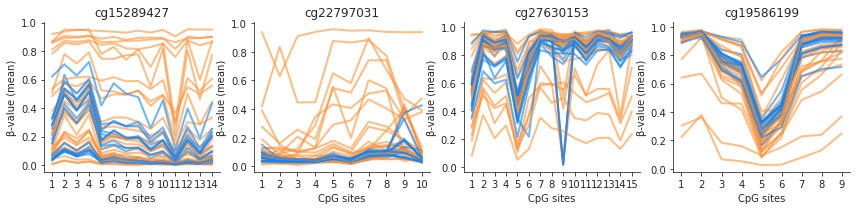

In [10]:
pt = pd.concat([beta_profile[x] for x in CpG_targets])
# pt = pt.loc[pt["group"].isin(["Ctrl", "FD"]),]
pt = pt.loc[pt["group"].isin(["MP", "MN"]),]

# pal = [colors["Ctrl"], colors["FD"], colors["MP"], colors["MN"]]
pal = {ss:colors[g] for ss, g in set(zip(samples["ID"], samples["Group ID"]))}

sns.set_style(style="ticks")
g = sns.FacetGrid(pt, col="cpg", hue="id", sharex=False, sharey=False, palette=pal)
g.map(sns.lineplot, "pos", "mean", alpha=.6, lw=2)
# g.add_legend()
for i, target in enumerate(CpG_targets):
    g.axes[0,i].set_xticks(range(1, len(CpG_positions[target])+1), minor=False)
    g.axes[0,i].set_xlabel('CpG sites')
    g.axes[0,i].set_ylabel('β-value (mean)')
    g.axes[0,i].set_title(target)
# g.savefig("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/Fig2_mean_beta_Ctrl_FD.pdf", dpi=600)
g.savefig("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/Fig2_mean_beta_MRD.pdf", dpi=600)



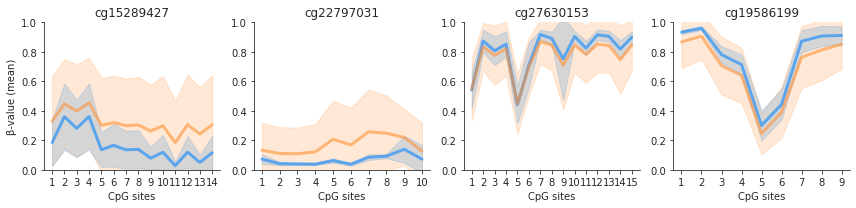

In [12]:
pt = pd.concat([beta_profile[x] for x in CpG_targets])
# pt = pt.loc[pt["group"].isin(["Ctrl", "FD"]),]
pt = pt.loc[pt["group"].isin(["MP", "MN"]),]

# pal = [colors["Ctrl"], colors["FD"], colors["MP"], colors["MN"]]

sns.set_style(style="ticks")
g = sns.FacetGrid(pt, col="cpg", hue="group", sharex=False, sharey=False, palette=colors)
g.map(sns.lineplot, "pos", "mean", alpha=.6, lw=3, ci="sd", estimator="mean")
# g.add_legend()
for i, target in enumerate(CpG_targets):
    g.axes[0,i].set_xticks(range(1, len(CpG_positions[target])+1), minor=False)
    g.axes[0,i].set_xlabel('CpG sites')
    g.axes[0,i].set_ylim(0,1)
    if i==0: g.axes[0,i].set_ylabel('β-value (mean)')
    g.axes[0,i].set_title(target)
plt.tight_layout()
# g.savefig("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/Fig2_mean_beta_sd_Ctrl_FD.pdf", dpi=600, bbox_inches="tight")
g.savefig("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/Fig2_mean_beta_sd_MRD.pdf", dpi=600, bbox_inches="tight")

Number of methylated CpGs

In [13]:

no_methylated = {}
for target in CpG_targets:
    print(target, end="")
    no_methylated[target] = []
    for s in samples["ID"]:
        print(".", end="")
        g = samples["Group ID"].loc[samples["ID"]==s].values[0]
        t = list_CpGs[target].loc[list_CpGs[target]["id"]==s,].iloc[:,3:]
        t = t.sum(axis = 1).value_counts().to_frame(name="count")
        t["methylated"] = t.index
        t["proportion"] = t["count"]/sum(t["count"])
        t["id"] = s
        t["group"] = g
        t["cpg"] = target
#         print(t)
        no_methylated[target].append(t)
    no_methylated[target] = pd.concat(no_methylated[target])
    print(no_methylated[target])

cg15289427............................................................................................................................................................      count  methylated  proportion      id group         cpg
0.0     197         0.0    0.187619  FD_11a    FD  cg15289427
13.0    170        13.0    0.161905  FD_11a    FD  cg15289427
12.0    134        12.0    0.127619  FD_11a    FD  cg15289427
14.0    104        14.0    0.099048  FD_11a    FD  cg15289427
11.0     83        11.0    0.079048  FD_11a    FD  cg15289427
...     ...         ...         ...     ...   ...         ...
10.0     11        10.0    0.000856  Ctrl_Z  Ctrl  cg15289427
9.0       8         9.0    0.000623  Ctrl_Z  Ctrl  cg15289427
11.0      2        11.0    0.000156  Ctrl_Z  Ctrl  cg15289427
13.0      1        13.0    0.000078  Ctrl_Z  Ctrl  cg15289427
12.0      1        12.0    0.000078  Ctrl_Z  Ctrl  cg15289427

[2113 rows x 6 columns]
cg22797031.......................................................

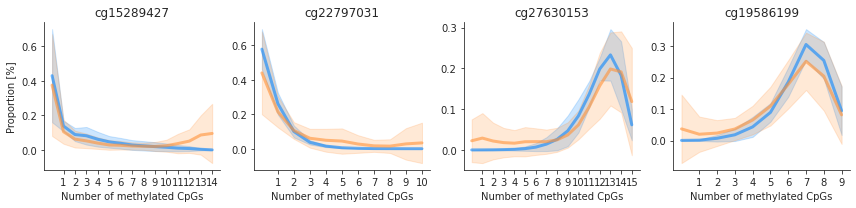

In [15]:
pt = pd.concat([no_methylated[x] for x in CpG_targets])
# pt = pt.loc[pt["group"].isin(["Ctrl", "FD"]),]
pt = pt.loc[pt["group"].isin(["MP", "MN"]),]

sns.set_style(style="ticks")
g = sns.FacetGrid(pt, col="cpg", hue="group", sharex=False, sharey=False, palette=colors)
g.map(sns.lineplot, "methylated", "proportion", alpha=.6, lw=3, ci="sd", estimator="mean")
# g.add_legend()
for i, target in enumerate(CpG_targets):
    g.axes[0,i].set_xticks(range(1, len(CpG_positions[target])+1), minor=False)
    g.axes[0,i].set_xlabel('Number of methylated CpGs')
    if i == 0: g.axes[0,i].set_ylabel('Proportion [%]')
    g.axes[0,i].set_title(target)
plt.tight_layout()
# g.savefig("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/Fig2_no_methylated_cpgs_Ctrl_FD.pdf", dpi=600, bbox_inches="tight")
g.savefig("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/Fig2_no_methylated_cpgs_MRD.pdf", dpi=600, bbox_inches="tight")

PCA on patterns

In [16]:
pca_table = []
for target in CpG_targets:
    t = list_patterns[target]
    tt = t.pivot(index='id', columns='pattern', values='proportion')
    tt = tt.replace(np.nan, 0)
    tt["group"] = [x.split("_")[0] for x in tt.index.values]
#     print(tt.drop(columns=["group"]))
    pca = PCA(n_components=2)
    pca.fit(tt.drop(columns=["group"]))
    x_pca = pd.DataFrame(pca.transform(tt.drop(columns=["group"])), columns=["PC1","PC2"], index=tt["group"])
#     x_pca["group"] = tt["group"]
#     print(x_pca)
    
    x_pca["cpg"] = target
    pca_table.append(x_pca)
    
pt = pd.concat(pca_table)
pt["group"] = pt.index

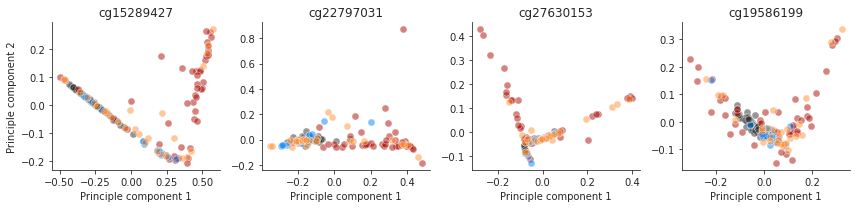

In [17]:
# pt = pt.loc[pt["group"].isin(["Ctrl", "FD"]),]
# pt = pt.loc[pt["group"].isin(["MP", "MN"]),]

sns.set_style(style="ticks")
g = sns.FacetGrid(pt, col="cpg", hue="group", sharex=False, sharey=False, palette=colors)
g.map(sns.scatterplot, "PC1", "PC2", alpha=.5, s=50)
# g.add_legend()
for i, target in enumerate(CpG_targets):
#     g.axes[0,i].set_xticks(range(1, len(CpG_positions[target])+1), minor=False)
    g.axes[0,i].set_xlabel('Principle component 1')
    if i == 0: g.axes[0,i].set_ylabel('Principle component 2')
    g.axes[0,i].set_title(target)
plt.tight_layout()
g.savefig("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/Fig2_PCA.pdf", dpi=600, bbox_inches="tight")

,Unnamed: 0,sample,group,anomaly_ratio
0,0,Ctrl_AC,Ctrl,0.052086
1,1,Ctrl_AF,Ctrl,0.059656
2,2,Ctrl_AL,Training,0.045476
3,3,Ctrl_AO,Training,0.077005
4,4,Ctrl_AP,Training,0.084518
...,...,...,...,...
151,151,MP_56d,MP,0.101211
152,152,MP_56e,MP,0.431460
153,153,MP_57b,MP,0.118568
154,154,MP_58a,MP,0.071160


In [4]:
pt1 = pd.read_csv("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/benchmark/AMLscore_MiSeq.csv",
                              names=['group', 'id', 'cpg', 'beta'], skiprows=1)
pt1 = pt1.pivot_table(index=["id", "group"], columns='cpg', values='beta')
pt1 = pd.DataFrame(pt1.to_records())
pt1["AMLscore"] = 0.25*(pt1["cg15289427"] + pt1["cg22797031"] - pt1["cg27630153"] - pt1["cg19586199"] + 2)
pt1 = pt1.reset_index()
pt1 = pt1.drop(columns=["cg15289427","cg22797031","cg27630153","cg19586199"]) 
pt1 = pt1.loc[pt1["group"].isin(['Ctrl', 'FD', 'MN', 'MP']),]

pt2 = pd.read_csv("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/benchmark/res_random_forest.csv",
                                  names=["cpg", "group", "id", "random forest anomaly"], skiprows=1).drop(columns="cpg")
pt = pt1.merge(pt2,how='outer', left_on="id", right_on="id",  suffixes=('_amlscore', '_randomforest'))

pt3 = pd.read_csv("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/benchmark/autoencoder_1cluster.csv",)
pt = pt.merge(pt3,how='outer', left_on="id", right_on="sample", suffixes=('', '_autoencoder1'))

pt4 = pd.read_csv("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/benchmark/autoencoder_5cluster.csv",)
pt = pt.merge(pt4,how='outer', left_on="id", right_on="sample", suffixes=('_autoencoder1', '_autoencoder5'))

pt = pt.loc[:,['id', 'group_amlscore', 'AMLscore', 'group_randomforest', 'random forest anomaly',
               'group_autoencoder1', 'anomaly_ratio_autoencoder1', 'group_autoencoder5', 'anomaly_ratio_autoencoder5']]
pt = pt.dropna()

In [5]:
pt["anomaly_ratio_autoencoder1"]

0      0.052086
1      0.059656
2      0.045476
3      0.077005
4      0.084518
         ...   
151    0.101211
152    0.431460
153    0.118568
154    0.071160
155    0.051010
Name: anomaly_ratio_autoencoder1, Length: 156, dtype: float64

In [7]:
r = 1.05
treshold_AMLscore = max(pt.loc[pt["group_autoencoder1"]=="Training", 'AMLscore'])* r
treshold_randomforest = max(pt.loc[pt["group_autoencoder1"]=="Training", 'random forest anomaly'])* r
treshold_autoencoder1 = max(pt.loc[pt["group_autoencoder1"]=="Training", 'anomaly_ratio_autoencoder1'])* r
treshold_autoencoder5 = max(pt.loc[pt["group_autoencoder5"]=="Training", 'anomaly_ratio_autoencoder5'])* r
joblib.dump([treshold_AMLscore,treshold_randomforest,treshold_autoencoder1,treshold_autoencoder5], 'thresholds.sav') 

['thresholds.sav']

In [59]:
# cm = pd.DataFrame(index = ["Control (Training)", "Control (Validation)", "First Diagnosis", "MRD Negative", "MRD Positive"],
#                   columns = ["Prediction with anomaly leukemia cells", "Prediction healthy"])
def confusionmatrix(d, tag_anomaly, threshold):
    cm = pd.DataFrame(index = ["Training", "Validation", "FD", "MN", "MP"],
                      columns = ["abnormal", "normal"])

    ratios = d.loc[d["group_autoencoder1"]=="Training",tag_anomaly].values
    cm.loc["Training", "normal"] = sum(ratios < threshold)
    cm.loc["Training", "abnormal"] = sum(ratios >= threshold)

    ratios = d.loc[d["group_autoencoder1"]=="Ctrl",tag_anomaly].values
    cm.loc["Validation", "normal"] = sum(ratios < threshold)
    cm.loc["Validation", "abnormal"] = sum(ratios >= threshold)

    ratios = d.loc[d["group_autoencoder1"]=="FD",tag_anomaly].values
    cm.loc["FD", "normal"] = sum(ratios < threshold)
    cm.loc["FD", "abnormal"] = sum(ratios >= threshold)

    ratios = d.loc[d["group_autoencoder1"]=="MN",tag_anomaly].values
    cm.loc["MN", "normal"] = sum(ratios < threshold)
    cm.loc["MN", "abnormal"] = sum(ratios >= threshold)

    ratios = d.loc[d["group_autoencoder1"]=="MP",tag_anomaly].values
    cm.loc["MP", "normal"] = sum(ratios < threshold)
    cm.loc["MP", "abnormal"] = sum(ratios >= threshold)
    
    sumrow = cm["abnormal"] + cm["normal"]
    cm["abnormal"] = cm["abnormal"]/sumrow
    cm["normal"] = cm["normal"]/sumrow
    return cm

cm_AMLscore = confusionmatrix(pt, "AMLscore", treshold_AMLscore)
cm_randomforest = confusionmatrix(pt, "random forest anomaly", treshold_randomforest)
cm_autoencoder1 = confusionmatrix(pt, "anomaly_ratio_autoencoder1", treshold_autoencoder1)
cm_autoencoder5 = confusionmatrix(pt, "anomaly_ratio_autoencoder5", treshold_autoencoder5)

In [60]:
cm_AMLscore

,abnormal,normal
Training,0,1
Validation,0,1
FD,1,0
MN,0.411765,0.588235
MP,0.655172,0.344828


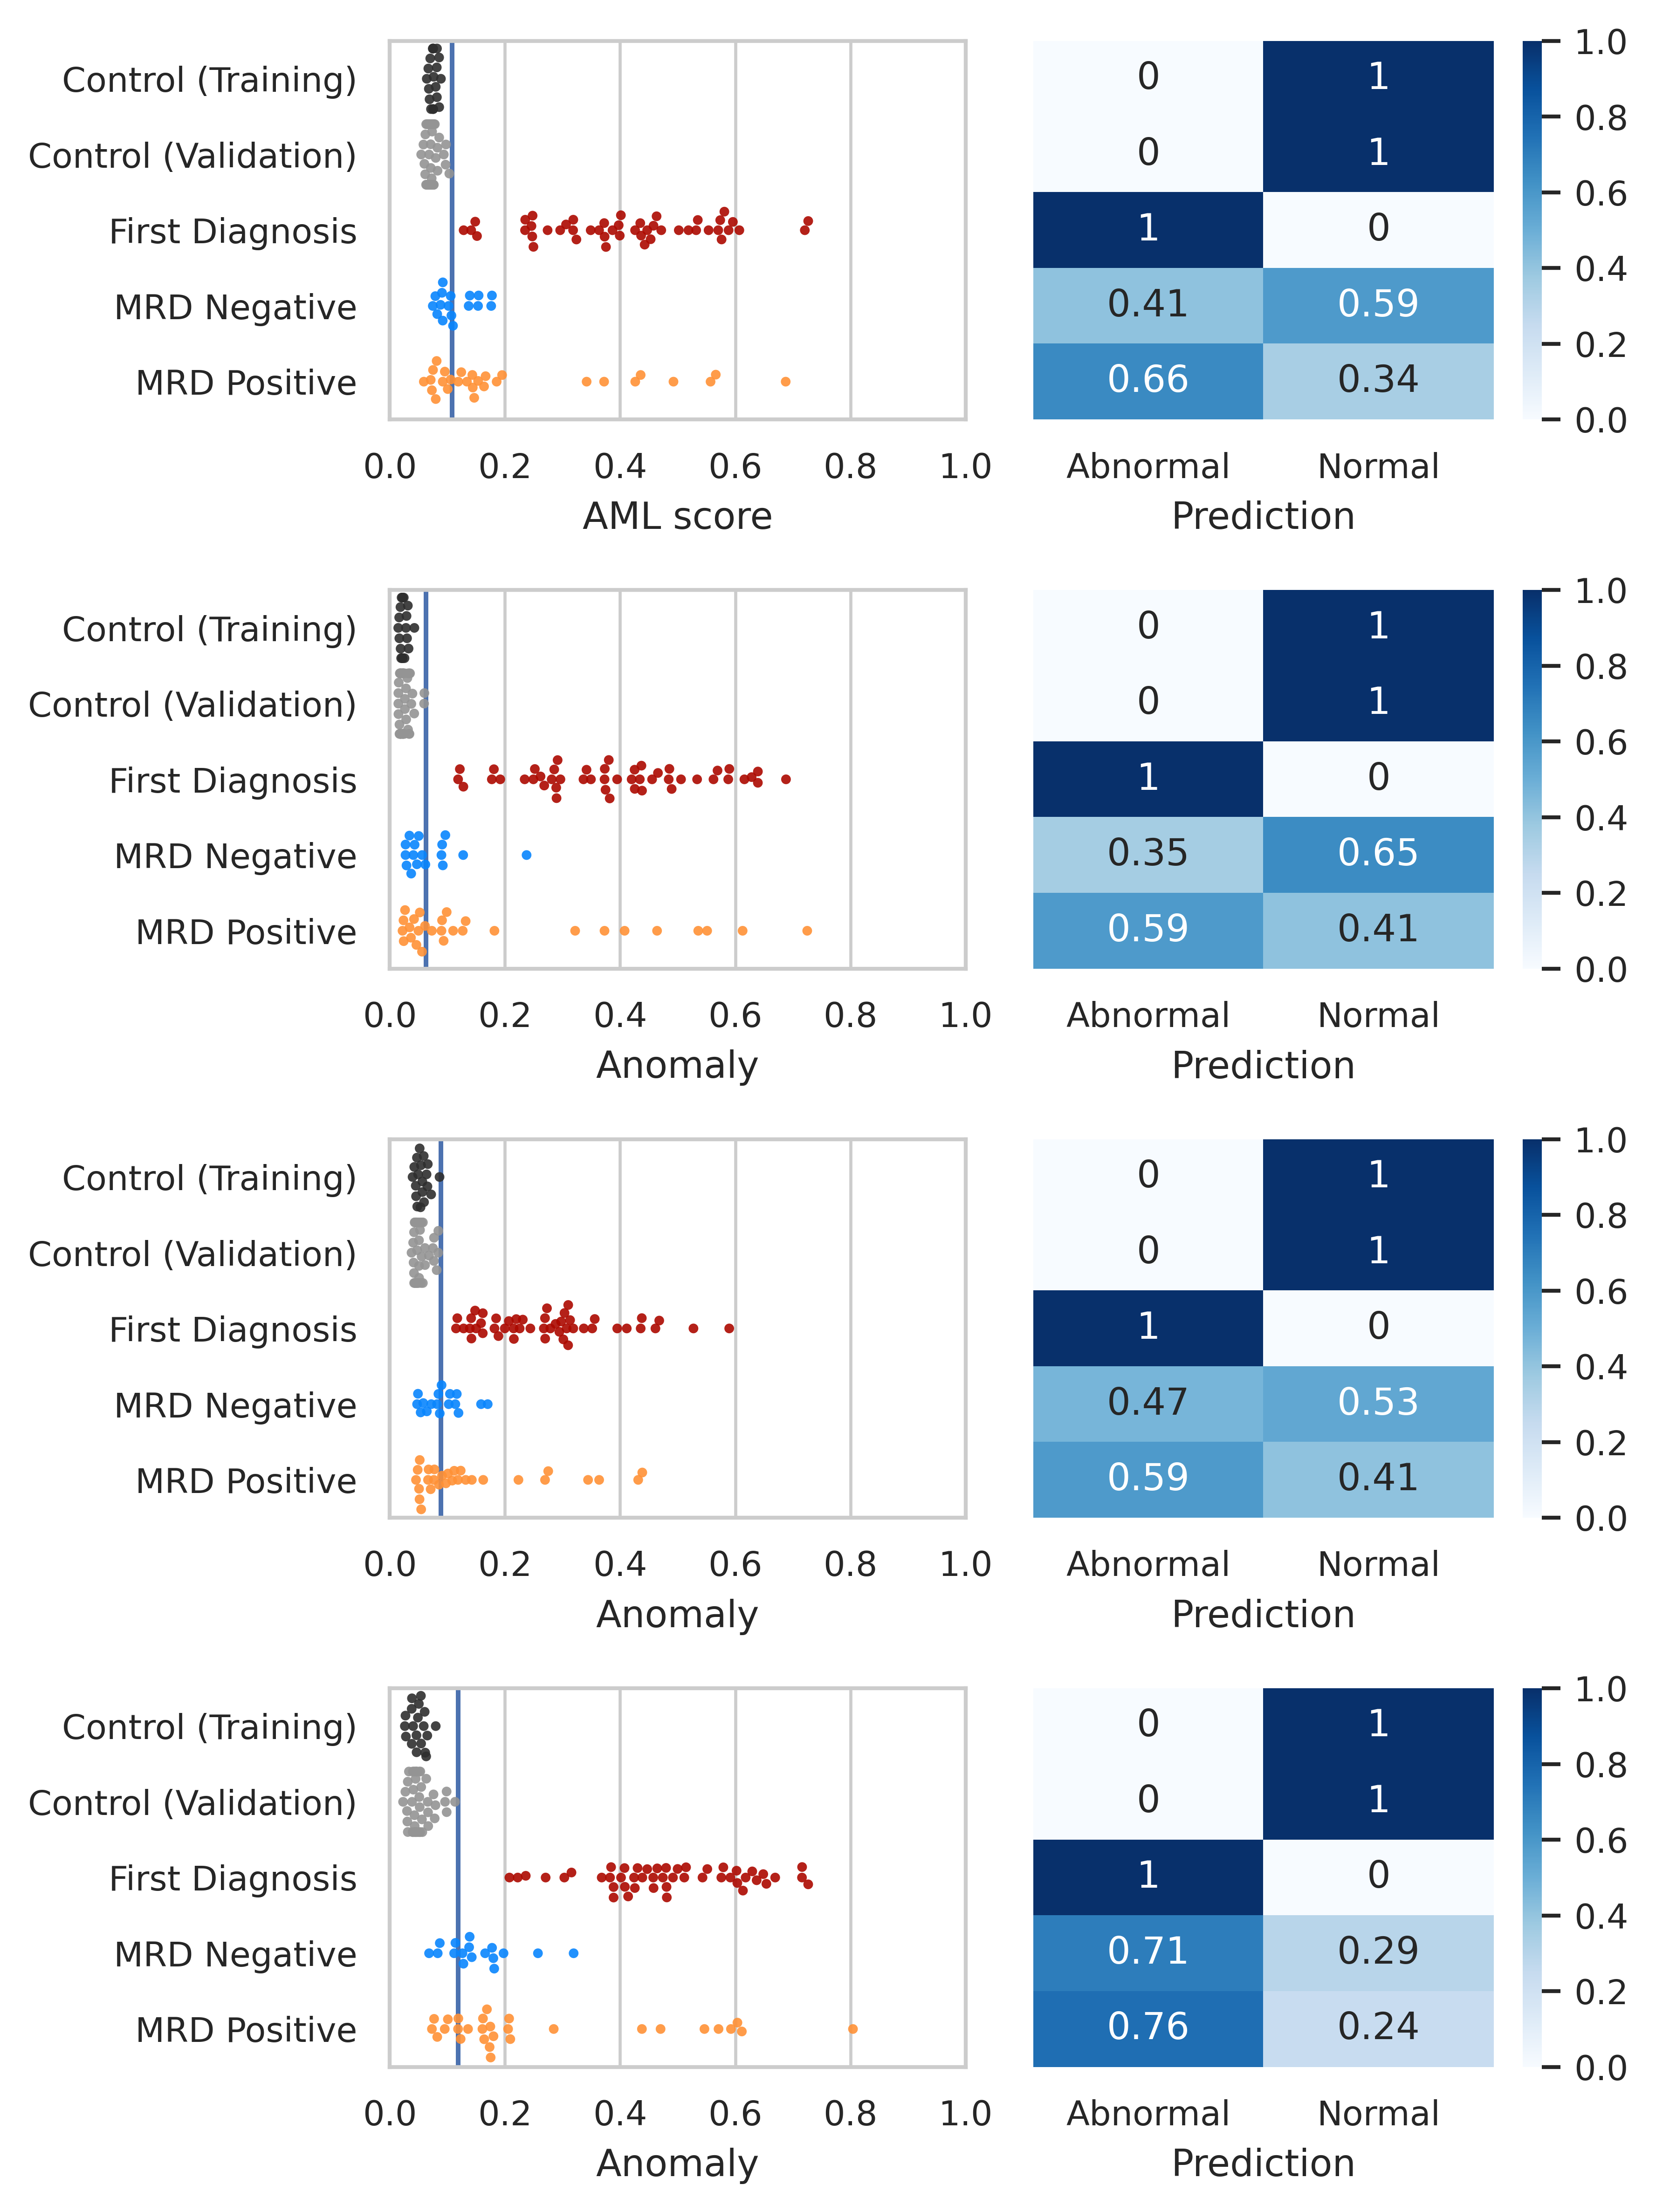

In [65]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")

def swarmplot(ax, data, xlabel, ylabel, title, threshold):
    sns.swarmplot(x=xlabel, y=ylabel, data=data,
              ax=ax, hue=ylabel, palette=colors, dodge=False, color=".25", size=2.5, alpha=0.9,
              order=["Ctrl", "Training", "FD", "MN", "MP"])
#     ax.set_title(title)
    ax.set_xlim([0,1])
    ax.set(xlabel=title)
    ax.set(ylabel='')
    ax.set_yticklabels(["Control (Training)", "Control (Validation)", "First Diagnosis","MRD Negative", "MRD Positive"], rotation=0, ha='right')
    ax.get_legend().remove()
    ax.axvline(threshold, 0,1)
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(title='', loc=2,
#                handles= handles, labels=["Control (Training)", "Control (Validation)", "First Diagnosis",
#                                          "MRD Negative", "MRD Positive"])

def hm(ax, cm):
    hm = sns.heatmap(cm.to_numpy(dtype=np.float64), annot=True, cmap=plt.cm.Blues, ax=ax)
    locs, labels = hm.get_xticks()
    hm.set_yticklabels([], 
                       rotation=0)
    hm.set_xticklabels(["Abnormal", "Normal"], rotation=0)
    hm.set_xlabel("Prediction")
####### Figures #########
f, axs = plt.subplots(4, 2, figsize=(6, 8), dpi=600, gridspec_kw={'width_ratios': [1, 1]})
# sns.boxplot(x="group", y="anomaly_ratio", data=anomaly["Mean"],
#             ax=axs, hue="group", palette=colors, dodge=False, showfliers = False)
swarmplot(axs[0,0], pt, "AMLscore", "group_autoencoder1", "AML score", treshold_AMLscore)
swarmplot(axs[1,0], pt, "random forest anomaly", "group_autoencoder1", "Anomaly", treshold_randomforest)
swarmplot(axs[2,0], pt, "anomaly_ratio_autoencoder1", "group_autoencoder1", "Anomaly", treshold_autoencoder1)
swarmplot(axs[3,0], pt, "anomaly_ratio_autoencoder5", "group_autoencoder1", "Anomaly", treshold_autoencoder5)
hm(axs[0,1], cm_AMLscore)
hm(axs[1,1], cm_randomforest)
hm(axs[2,1], cm_autoencoder1)
hm(axs[3,1], cm_autoencoder5)


plt.tight_layout()
plt.show()
f.savefig("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/benchmark.pdf", bbox_inches='tight', dpi=600)

In [12]:
anomaly_randomForest = pd.read_csv("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/benchmark/res_random_forest.csv",
                                  names=["cpg", "group", "id", "anomaly"])
anomaly_autoencoder1 = pd.read_csv("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/benchmark/autoencoder_1cluster.csv",
                                  names=["X",'id', 'cpg', 'beta' ])

Index(['group', 'id', 'cpg', 'beta', 'method'], dtype='object')

,Unnamed: 0,sample,group,anomaly_ratio
0,0,Ctrl_AC,Ctrl,0.052086
1,1,Ctrl_AF,Ctrl,0.059656
2,2,Ctrl_AL,Training,0.045476
3,3,Ctrl_AO,Training,0.077005
4,4,Ctrl_AP,Training,0.084518
...,...,...,...,...
151,151,MP_56d,MP,0.101211
152,152,MP_56e,MP,0.431460
153,153,MP_57b,MP,0.118568
154,154,MP_58a,MP,0.071160
